In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings

In [281]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [282]:
df = pd.read_csv('loan_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [283]:
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [284]:
df.describe()

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [285]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [286]:
df.duplicated().sum()

0

In [287]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [288]:
df.columns = df.columns.str.replace('.', '-')
df.columns

Index(['credit-policy', 'purpose', 'int-rate', 'installment', 'log-annual-inc',
       'dti', 'fico', 'days-with-cr-line', 'revol-bal', 'revol-util',
       'inq-last-6mths', 'delinq-2yrs', 'pub-rec', 'not-fully-paid'],
      dtype='object')

In [289]:
featList = df.select_dtypes('number').columns

In [290]:
lenFL = len(featList)
row = lenFL // 3 + 1
fig = make_subplots(cols = 3,
                    rows = row,
                    subplot_titles=[f'<i>{i.title()}</i>' for i in featList])

for i in range(lenFL):
    fig.add_trace(go.Histogram(x = df[featList[i]]), 
                  col = i // row + 1, 
                  row = i % row + 1)
    
fig.update_layout(height= row * 300,
                  width = 1200,
                  title_text = '<b>Feature Distribution',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  showlegend = False)

In [291]:
fig = px.histogram(df,
             x = 'not-fully-paid',
             color = 'not-fully-paid',
             template = 'plotly_dark',
             title = 'Ratio of People with their Loan Not Fully Paid',
             )

fig.update_traces(showlegend =  False)
fig.show()

In [292]:
fig = px.histogram(df,
             y = 'not-fully-paid',
             x = 'purpose',
             color = 'purpose',
             template = 'plotly_dark',
             title = 'Number of People with their Loan Not Fully Paid for different Intrest Rates',
             )

fig.show()

In [293]:
px.scatter(data_frame=df, 
           x = 'revol-util',
           y = 'revol-bal',
           color = 'not-fully-paid',
           template = 'plotly_dark')

In [294]:
lenFL = len(featList)
row = lenFL // 3 + 1
fig = make_subplots(cols = 3,
                    rows = row,
                    subplot_titles=[f'<i>{i.title()}</i>' for i in featList])

for i in range(lenFL):
    fig.add_trace(go.Box(x = df[featList[i]]), 
                  col = i // row + 1, 
                  row = i % row + 1)
    
fig.update_layout(height= row * 300,
                  width = 1200,
                  title_text = '<b>Feature Distribution',
                  template = 'plotly_dark',
                  title_x = 0.5,
                  showlegend = False)

In [295]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [296]:
df['purpose'] = LabelEncoder().fit_transform(df['purpose'])
df.head()

credit-policy  purpose  int-rate  installment  log-annual-inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days-with-cr-line  revol-bal  revol-util  inq-last-6mths  delinq-2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub-rec  not-fully-paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

In [297]:
def outliers(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    IQR = q3-q1     
    lwr = q1-1.5*IQR
    upr = q3+1.5*IQR
    
    outliers = df[col][((df[col]<(lwr)) | (df[col]>(upr)))]
    
    return (outliers, lwr, upr, len(outliers))

In [298]:
for col in df.columns:
    print(f'>>> {col.title()} : {outliers(col)[3]}')

>>> Credit-Policy : 1868
>>> Purpose : 1685
>>> Int-Rate : 51
>>> Installment : 236
>>> Log-Annual-Inc : 238
>>> Dti : 0
>>> Fico : 6
>>> Days-With-Cr-Line : 346
>>> Revol-Bal : 780
>>> Revol-Util : 0
>>> Inq-Last-6Mths : 478
>>> Delinq-2Yrs : 1120
>>> Pub-Rec : 559
>>> Not-Fully-Paid : 1533


In [299]:
px.imshow(df.corr(),
          text_auto = '.2f',
          height = 1000,
          width = 1000,
          template = 'plotly_dark',
          color_continuous_scale='tealrose')

In [300]:
corr_loan =  df.corr(numeric_only=True)['not-fully-paid'].drop('not-fully-paid').sort_values(ascending=True)

px.bar(y=corr_loan.index,x=corr_loan.values,
      template = 'plotly_dark',
      title = 'Correlation of Repayment_rate with other variable')

In [301]:
# Dropping items with negative correlation
# df.drop(['fico', 'inq-last-6mths', 'revol-util', 'credit-policy'], 
#         axis = 1,
#         inplace = True)

In [302]:
px.imshow(df.corr(),
          text_auto = '.2f',
          height = 1000,
          width = 1000,
          template = 'plotly_dark',
          color_continuous_scale='tealrose')

In [303]:
x = df.drop('not-fully-paid', 
            axis = 1)
y = df['not-fully-paid']
y.value_counts()

not-fully-paid
0    8045
1    1533
Name: count, dtype: int64

In [304]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [305]:
y.value_counts()

not-fully-paid
0    8045
1    8045
Name: count, dtype: int64

In [306]:
df.head()

credit-policy  purpose  int-rate  installment  log-annual-inc    dti  fico  \
0              1        2    0.1189       829.10       11.350407  19.48   737   
1              1        1    0.1071       228.22       11.082143  14.29   707   
2              1        2    0.1357       366.86       10.373491  11.63   682   
3              1        2    0.1008       162.34       11.350407   8.10   712   
4              1        1    0.1426       102.92       11.299732  14.97   667   

   days-with-cr-line  revol-bal  revol-util  inq-last-6mths  delinq-2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub-rec  not-fully-paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

In [307]:
from sklearn.model_selection import train_test_split

In [308]:
x.shape

(16090, 13)

In [309]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [310]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [311]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input(shape=(13,)))

model.add(tf.keras.layers.Dense(128,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(64,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# hidden layer
model.add(tf.keras.layers.Dense(16,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# hidden layer
model.add(tf.keras.layers.Dense(8,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# hidden layer
model.add(tf.keras.layers.Dense(4,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# hidden layer
model.add(tf.keras.layers.Dense(2,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))

# output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])

In [312]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,841 (50.16 KB)

 Trainable params: 12,841 (50.16 KB)

 Non-trainable params: 0 (0.00 B)

In [313]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              mode='auto',
                                              verbose=1,
                                              patience=10)

In [314]:
model.fit(
          x=x_train,
          y=y_train,  
          epochs=400,
          verbose = 1,
          batch_size=32,
          validation_data=(x_test, y_test),
          callbacks=[early_stop])

Epoch 1/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6117 - loss: 0.6610 - val_accuracy: 0.6578 - val_loss: 0.6410
Epoch 2/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6637 - loss: 0.6311 - val_accuracy: 0.6476 - val_loss: 0.6388
Epoch 3/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6592 - loss: 0.6243 - val_accuracy: 0.6589 - val_loss: 0.6293
Epoch 4/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6630 - loss: 0.6190 - val_accuracy: 0.6616 - val_loss: 0.6240
Epoch 5/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6653 - loss: 0.6124 - val_accuracy: 0.6586 - val_loss: 0.6226
Epoch 6/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6645 - loss: 0.6133 - val_accuracy: 0.6640 - val_loss: 0.6187
Epoch 7/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6646 - loss: 0.6124 - val_accuracy: 0.6657 - val_loss: 0.6218
Epoch 8/400
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6758 - loss: 0.6040 - val_accu

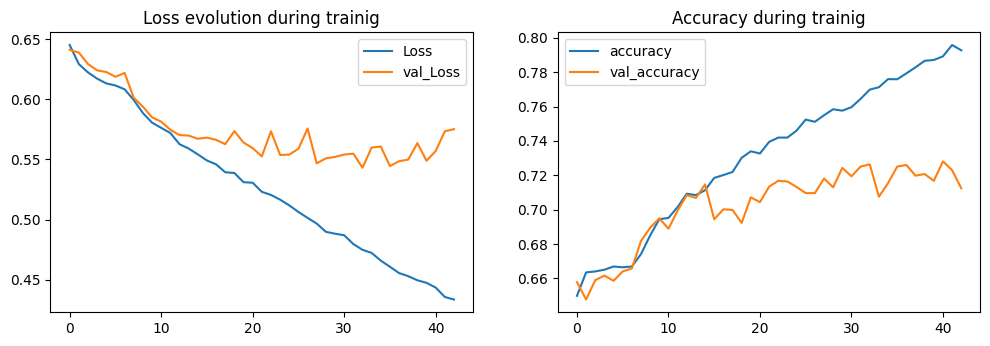

In [315]:


error_df = pd.DataFrame(model.history.history)

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(error_df['loss'], label='Loss')
plt.plot(error_df['val_loss'], label='val_Loss')
plt.title('Loss evolution during trainig')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(error_df['accuracy'], label='accuracy')
plt.plot(error_df['val_accuracy'], label='val_accuracy')
plt.title('Accuracy during trainig')
plt.legend();



In [316]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step


In [317]:
from sklearn.metrics import classification_report, confusion_matrix

In [318]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.60      0.68      2701
           1       0.67      0.83      0.74      2609

    accuracy                           0.71      5310
   macro avg       0.72      0.71      0.71      5310
weighted avg       0.73      0.71      0.71      5310



In [319]:
px.imshow(confusion_matrix(y_test, predictions),
          text_auto = True,
          template = 'plotly_dark')